In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.linalg import inv
import pandas as pd
np.random.seed(1234)

sample thêm 10 điểm dữ liệu cho tập valdiation

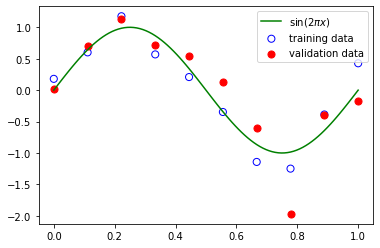

In [51]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_val, y_val = create_toy_data(func, 10, 0.5)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val

In [52]:
def mse(truth, predict):
    truth = np.array(truth)
    predict = np.array(predict)
    return np.mean((truth - predict) ** 2)

In [53]:
dict1 = {'x_train':x_train, 'y_train' :y_train}
train_df = pd.DataFrame(dict1)
train_df.head()

,x_train,y_train
0,0.000000,0.179726
1,0.111111,0.601148
2,0.222222,1.175961
3,0.333333,0.568665
4,0.444444,0.208306


In [54]:
dict2 = {'x_val':x_val, 'y_val' :y_val}
val_df = pd.DataFrame(dict2)
val_df.head()

,x_val,y_val
0,0.000000,0.014781
1,0.111111,0.704709
2,0.222222,1.129523
3,0.333333,0.715279
4,0.444444,0.549238


In [55]:
dict3 = {'x_test':x_test, 'y_test' :y_test}
test_df = pd.DataFrame(dict3)
test_df.head()

,x_test,y_test
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [56]:
class LinearRegression:
    def __init__(self, df, target):
        self.df = df
        self.target = target

    def find_coefficient(self):
        t = np.array(self.df[self.target]).reshape(self.df.shape[0],1)
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        x = np.concatenate((np.ones((self.df.shape[0], 1)), feature), axis= 1)
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(t)).reshape(feature.shape[1]+1, 1)
        return w

    def add_predict_column(self):
        newdf = self.df.copy()
        feature = np.array(self.df.loc[:, self.df.columns != self.target]).reshape(self.df.shape[0], self.df.shape[1]-1)
        w = self.find_coefficient()
        newdf['predict'] = feature.dot(w[1:,]) + w[0]
        return newdf

    def mse(self):
        newdf = self.add_predict_column()
        return np.mean((newdf['predict'] - newdf[self.target]) ** 2)

    def predict_value(self, list1):
        array = np.array(list1).reshape(1,len(list1))
        w = self.find_coefficient()
        return array.dot(w[1:,]) + w[0]

    def print_model(self):
        feature = (self.df.loc[:, self.df.columns != self.target])
        w = self.find_coefficient()
        print('y =', end=' ')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),2), feature.columns[i-1], '+', end=' ')
        print(round(float(w[0][0]),2))

In [57]:
# bac 1
model1 = LinearRegression(train_df, 'y_train')
print(model1.find_coefficient())
model1.print_model()
model1.mse()

[[ 0.6172537 ]
 [-1.22746081]]
y = -1.23 x_train + 0.62


0.3926538191575659

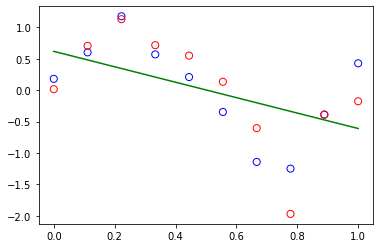

In [58]:
model1_predict = model1.add_predict_column()
plt.scatter(x_train,y_train, facecolor="none", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="none", edgecolor="r", s=50, label="val data")
plt.plot(x_train, model1_predict.predict,'g')

In [59]:
print('MSE Training:',mse(y_train, model1_predict.predict))
print('MSE Validation:',mse(y_val, model1_predict.predict))

MSE Training: 0.3926538191575659
MSE Validation: 0.45746214515382916


In [60]:
# bac 3
train_df3 = train_df.copy()
train_df3['x^2'] = x_train ** 2
train_df3['x^3'] = x_train ** 3

In [61]:
model3 = LinearRegression(train_df3, 'y_train')
print(model3.find_coefficient())
model3.print_model()

[[  0.08270818]
 [ 10.40847753]
 [-33.8893503 ]
 [ 23.90618526]]
y = 10.41 x_train + -33.89 x^2 + 23.91 x^3 + 0.08


In [62]:
w3 = model3.find_coefficient()
x3 = np.linspace(0,1,100)
y3 = w3[1]*x3 + w3[2]*x3**2 + w3[3]*x3**3 + w3[0]

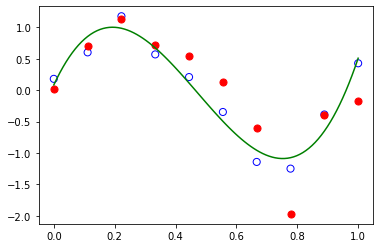

In [63]:
model3_predict = model3.add_predict_column()
plt.scatter(x_train,y_train, facecolor="none", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="val data")
plt.plot(x3, y3,'g')

In [64]:
print('MSE Training:',mse(y_train, model3_predict.predict))
print('MSE Validation:',mse(y_val, model3_predict.predict))

MSE Training: 0.02925827462990773
MSE Validation: 0.20961933693448181


In [65]:
# bac 9
train_df9 = train_df.copy()
train_df9['x^2'] = x_train ** 2
train_df9['x^3'] = x_train ** 3
train_df9['x^4'] = x_train ** 4
train_df9['x^5'] = x_train ** 5
train_df9['x^6'] = x_train ** 6
train_df9['x^7'] = x_train ** 7
train_df9['x^8'] = x_train ** 8
train_df9['x^9'] = x_train ** 9

train_df9.head()

,x_train,y_train,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9
0,0.000000,0.179726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.111111,0.601148,0.012346,0.001372,0.000152,0.000017,0.000002,2.090752e-07,2.323057e-08,2.581175e-09
2,0.222222,1.175961,0.049383,0.010974,0.002439,0.000542,0.000120,2.676162e-05,5.947027e-06,1.321561e-06
3,0.333333,0.568665,0.111111,0.037037,0.012346,0.004115,0.001372,4.572474e-04,1.524158e-04,5.080526e-05
4,0.444444,0.208306,0.197531,0.087791,0.039018,0.017342,0.007707,3.425487e-03,1.522439e-03,6.766395e-04


In [66]:
model9 = LinearRegression(train_df9,'y_train')
print(model9.find_coefficient())
model9.print_model()

[[ 1.79667500e-01]
 [-5.04183041e+01]
 [ 1.09691161e+03]
 [-8.21828679e+03]
 [ 3.11738988e+04]
 [-6.78310579e+04]
 [ 8.79315528e+04]
 [-6.69342808e+04]
 [ 2.75603051e+04]
 [-4.72837698e+03]]
y = -50.42 x_train + 1096.91 x^2 + -8218.29 x^3 + 31173.9 x^4 + -67831.06 x^5 + 87931.55 x^6 + -66934.28 x^7 + 27560.31 x^8 + -4728.38 x^9 + 0.18


In [31]:
w9= model9.find_coefficient()
x9 = np.linspace(0,1,100)
y9 = w9[1]*x9 + w9[2]*x9**2 + w9[3]*x9**3 + w9[4]*x9**4 + w9[5]*x9**5 + w9[6]*x9**6  + w9[7]*x9**7 + w9[8]*x9**8 + w9[9]*x9**9 + w9[0]

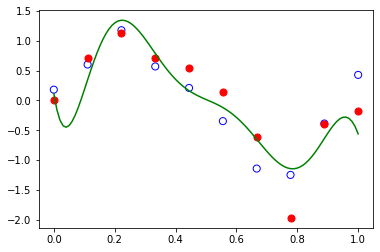

In [67]:
model9_predict = model9.add_predict_column()
plt.scatter(x_train,y_train, facecolor="none", edgecolor="b", s=50, label="val data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="val data")
plt.plot(x9, y9,'g')

In [68]:
print('MSE Training:',mse(y_train, model9_predict.predict))
print('MSE Validation:',mse(y_val, model9_predict.predict))

MSE Training: 7.644934471621854e-09
MSE Validation: 0.15816906895112068


thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting

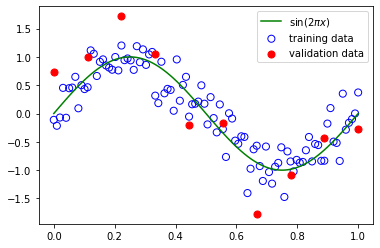

In [69]:
def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 100, 0.25)
x_val, y_val = create_toy_data(func, 10, 0.5)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=50, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()